<a href="https://colab.research.google.com/github/pswaruppk/GL_CAPSTONE/blob/master/Classification_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ensemble of classification 
  This notebook will ensemble output of densenet121, InceptionResnetV2,Inception V3

In [ ]:
import os
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = "/content/drive/My Drive/rsna-pneumonia-detection-challenge"
os.chdir(project_path)
os.getcwd()

'/content/drive/My Drive/rsna-pneumonia-detection-challenge'

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 299
IMG_WIDTH = 1024

In [ ]:
BASE_MODEL = "InceptionResNetV2"
MODEL_NAME  = "Option-1" + "." + BASE_MODEL
pred_dump_file = MODEL_NAME + '/class_prediction_299.csv'
print('Loading file:',pred_dump_file)
inception_res_v2_df = pd.read_csv(pred_dump_file)

Loading file: Option-1.InceptionResNetV2/class_prediction_299.csv


In [ ]:
# inception_res_v2_df.drop(inception_res_v2_df.columns[0],inplace=True,axis=1)

In [ ]:
inception_res_v2_df.head()

,patientId,PNEUMONIA,NOT_NORMAL,NORMAL
0,9827bfae-729a-455c-817b-e775253bf568,0.217899,0.721338,0.060763
1,5006f783-56af-4ad9-a37b-c80bd789ddbd,0.039144,0.230550,0.730305
2,e065606f-3368-47ff-b4d1-ef783e97813f,0.900557,0.098824,0.000619
3,99306946-1577-4724-be54-9b8b1b1a7869,0.621295,0.370927,0.007778
4,156634a8-5ca7-4822-92cd-677aedc2247a,0.750515,0.229232,0.020253


In [ ]:
BASE_MODEL = "DenseNet121"
MODEL_NAME  = "Option-1" + "." + BASE_MODEL
pred_dump_file = MODEL_NAME + '/class_prediction.csv'
print('Loading file:',pred_dump_file)
densenet_df = pd.read_csv(pred_dump_file)


Loading file: Option-1.DenseNet121/class_prediction.csv


In [ ]:
densenet_df.head()

,patientId,PNEUMONIA,NOT_NORMAL,NORMAL
0,81cc48ed-0b64-436e-809e-47c3fc35006f,0.060745,0.181098,0.758157
1,74075cca-a426-4710-92de-e23aa74b76ac,0.783721,0.190050,0.026228
2,d442daf0-cc56-4c05-8874-94712aa53704,0.313819,0.411228,0.274952
3,2bbcfa00-cfcb-4761-b3e3-83687fd65d5b,0.690628,0.289071,0.020301
4,c97fe65e-3d97-4941-ad80-70f745d7d41f,0.032692,0.160328,0.806980


In [ ]:
densenet_df.shape

(12624, 4)

In [ ]:
BASE_MODEL = "InceptionV3"
MODEL_NAME  = "Option-1" + "." + BASE_MODEL
pred_dump_file = MODEL_NAME + '/class_prediction.csv'
print('Loading file:',pred_dump_file)
inceptionV3_df = pd.read_csv(pred_dump_file)

Loading file: Option-1.InceptionV3/class_prediction.csv


In [ ]:
inceptionV3_df.drop(inceptionV3_df.columns[0],inplace=True,axis=1)

In [ ]:
inceptionV3_df.head()

,patientId,PNEUMONIA,NOT_NORMAL,NORMAL
0,2a607bec-696e-4248-b6cc-21a6266744bd,0.041635,0.195971,0.762393
1,e25063da-1731-4976-8a43-0830668a3fbd,0.006187,0.041193,0.952620
2,473cc35e-bf1d-4253-891e-5fab620cb47b,0.920030,0.079762,0.000208
3,6f5d9135-ffc5-4076-872d-ba8a5bf7e8e4,0.587962,0.186002,0.226037
4,69333c71-1675-48fa-a1d7-5a7d122293f4,0.017730,0.028607,0.953664


In [ ]:
inceptionV3_df.shape

(12624, 4)

In [ ]:
merge_df = pd.merge(inception_res_v2_df, inceptionV3_df, on="patientId",how='inner')

In [ ]:
merge_df = pd.merge(merge_df,densenet_df, on="patientId",how='inner')

In [ ]:
merge_df.head()

,patientId,PNEUMONIA_x,NOT_NORMAL_x,NORMAL_x,PNEUMONIA_y,NOT_NORMAL_y,NORMAL_y,PNEUMONIA,NOT_NORMAL,NORMAL
0,9827bfae-729a-455c-817b-e775253bf568,0.217899,0.721338,0.060763,0.370083,0.560294,0.069624,0.357657,0.615552,0.026790
1,5006f783-56af-4ad9-a37b-c80bd789ddbd,0.039144,0.230550,0.730305,0.027647,0.298215,0.674138,0.068119,0.323079,0.608801
2,e065606f-3368-47ff-b4d1-ef783e97813f,0.900557,0.098824,0.000619,0.898731,0.094028,0.007241,0.723882,0.268343,0.007775
3,99306946-1577-4724-be54-9b8b1b1a7869,0.621295,0.370927,0.007778,0.470769,0.524746,0.004485,0.491383,0.505415,0.003202
4,156634a8-5ca7-4822-92cd-677aedc2247a,0.750515,0.229232,0.020253,0.874663,0.122560,0.002777,0.571656,0.425702,0.002642


In [ ]:
merge_df.isna().any()

patientId       False
PNEUMONIA_x     False
NOT_NORMAL_x    False
NORMAL_x        False
PNEUMONIA_y     False
NOT_NORMAL_y    False
NORMAL_y        False
PNEUMONIA       False
NOT_NORMAL      False
NORMAL          False
dtype: bool

In [ ]:
merge_df.shape

(12624, 10)

In [ ]:
oldPath = os.getcwd()
utility_path = "/content/drive/My Drive/GL_CAPSTONE"
os.chdir(utility_path)
%run pneumonia_utility.ipynb
os.chdir(oldPath)
print(os.getcwd())


Loading functions from Pneumonia utility notebook
Loading pydicom package
/content/drive/My Drive/rsna-pneumonia-detection-challenge


In [ ]:
full_df,bbox_map,class_enc = loadData()

Loading full CXR info
Loading bbox map


In [ ]:
full_df.head(1)

,Unnamed: 0,patientId,x,y,width,height,Target,BboxNo,PatientAge,PatientSex,ViewPosition,class,class_id,class_vector,path
0,0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,1,51,0,0,No Lung Opacity / Not Normal,1,"[0.0, 1.0, 0.0]",stage_2_train_images/0004cfab-14fd-4e49-80ba-6...


In [ ]:
class_df = full_df[['patientId','class_id']]

In [ ]:
class_df.head()

,patientId,class_id
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,1
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,2
4,00436515-870c-4b36-a041-de91049b9ab4,0


In [ ]:
class_df.shape

(30227, 2)

In [ ]:
class_df.drop_duplicates(subset ="patientId", 
                     keep = 'first', inplace = True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
class_df.shape

(26684, 2)

In [ ]:
merge_df = pd.merge(merge_df, class_df, on="patientId",how='inner')

In [ ]:
merge_df.sample(5)

,patientId,PNEUMONIA_x,NOT_NORMAL_x,NORMAL_x,PNEUMONIA_y,NOT_NORMAL_y,NORMAL_y,PNEUMONIA,NOT_NORMAL,NORMAL,class_id
8003,97b0ce05-4da2-4ec6-a48b-786b8562dd82,0.807109,0.186278,0.006612,0.856719,0.139938,0.003343,0.815318,0.175556,0.009125,0
8218,87c2b21c-7a98-492d-94c8-4f72620c5847,0.019682,0.127442,0.852876,0.144059,0.417568,0.438373,0.100891,0.265160,0.633950,2
11229,3d59faf9-6b80-42e5-b5fb-95048344c92a,0.383037,0.598625,0.018337,0.331641,0.566191,0.102168,0.411752,0.495085,0.093163,0
2056,b80c4378-bfb8-4dd6-8e93-a5e84fdb19ff,0.076754,0.151717,0.771530,0.080662,0.090374,0.828964,0.176738,0.183984,0.639277,2
9584,5b5676e3-f3d2-45d1-b46a-2f5cfcd19462,0.287325,0.525846,0.186829,0.306993,0.568924,0.124083,0.184737,0.528256,0.287007,1


In [ ]:
y = merge_df['class_id']
X = merge_df[merge_df.columns[1:10]]

In [ ]:
y

0        1
1        2
2        0
3        1
4        0
        ..
12619    1
12620    1
12621    0
12622    2
12623    0
Name: class_id, Length: 12624, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X.head()

,PNEUMONIA_x,NOT_NORMAL_x,NORMAL_x,PNEUMONIA_y,NOT_NORMAL_y,NORMAL_y,PNEUMONIA,NOT_NORMAL,NORMAL
0,0.217899,0.721338,0.060763,0.370083,0.560294,0.069624,0.357657,0.615552,0.026790
1,0.039144,0.230550,0.730305,0.027647,0.298215,0.674138,0.068119,0.323079,0.608801
2,0.900557,0.098824,0.000619,0.898731,0.094028,0.007241,0.723882,0.268343,0.007775
3,0.621295,0.370927,0.007778,0.470769,0.524746,0.004485,0.491383,0.505415,0.003202
4,0.750515,0.229232,0.020253,0.874663,0.122560,0.002777,0.571656,0.425702,0.002642


In [ ]:
from keras.utils import to_categorical
# one hot encode target values

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

#Build ensemble model

In [ ]:
#Build neural netwrok

from tensorflow.keras.layers import  Reshape
def add_layer(model):
  kinit ='he_normal' #tf.keras.initializers.he_normal()
  actv = 'relu' #activation.relu
  # model.add(Reshape((6,),input_shape=(32,32,)))
  # #Add batch normalization to avoid NAN in training loss
  # model.add(kl.normalization.BatchNormalization())
  #Add input layer -- 
  model.add(Dense(9,input_dim= 9,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #How many hidden layer? No clear rule, trial & error? Literature says, it 3 hidden layer sufficient
  #Add hidden layer -1
  model.add(Dense(16,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #Add hidden layer -2
  model.add(Dense(8,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #Add hidden layer -3
  model.add(Dense(4,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())


  #Add output layer -- number of output neoron 1(as the number of output is 10)
  #Add hidden layer -1
  model.add(Dense(3,activation='softmax',kernel_initializer=kinit))
  
en_model = Sequential()
add_layer(en_model)

In [ ]:
def fit_model(opt,model,epoch=60,verbo=1,batchsize=128):
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=batchsize, epochs=epoch, verbose=verbo)
  return history
opt = Adam()
history = fit_model(opt,en_model)

Epoch 1/60
89/89 [==============================] - 0s 5ms/step - loss: 1.5127 - accuracy: 0.4751 - val_loss: 1.0954 - val_accuracy: 0.4276
Epoch 2/60
89/89 [==============================] - 0s 2ms/step - loss: 0.7453 - accuracy: 0.7012 - val_loss: 0.8812 - val_accuracy: 0.6112
Epoch 3/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.7246 - val_loss: 0.7153 - val_accuracy: 0.7086
Epoch 4/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.7276 - val_loss: 0.6715 - val_accuracy: 0.7213
Epoch 5/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6416 - accuracy: 0.7272 - val_loss: 0.6578 - val_accuracy: 0.7165
Epoch 6/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7295 - val_loss: 0.6542 - val_accuracy: 0.7237
Epoch 7/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.7304 - val_loss: 0.6494 - val_accuracy: 0.7197
Epoch 8/60
89/89 [==

In [ ]:
pred_y = en_model.predict(X)

In [ ]:
pred_y

array([[0.24607512, 0.7352676 , 0.01865735],
       [0.01017449, 0.4109104 , 0.5789152 ],
       [0.9464455 , 0.050311  , 0.00324354],
       ...,
       [0.89622444, 0.09802904, 0.00574652],
       [0.01992593, 0.18576063, 0.7943135 ],
       [0.01165251, 0.034091  , 0.9542565 ]], dtype=float32)

In [ ]:
pred_map = {}
patients = merge_df.patientId.to_numpy()
for  idx,patient in enumerate(patients):
  if patient not in pred_map:
    classes = pred_y[idx]
    pred_map[patient] = {'PNEUMONIA':classes[0],'NOT_NORMAL':classes[1], "NORMAL":classes[2] }
pred_df = pd.DataFrame(pred_map).T

In [ ]:
pred_df.head()

,PNEUMONIA,NOT_NORMAL,NORMAL
9827bfae-729a-455c-817b-e775253bf568,0.246075,0.735268,0.018657
5006f783-56af-4ad9-a37b-c80bd789ddbd,0.010174,0.410910,0.578915
e065606f-3368-47ff-b4d1-ef783e97813f,0.946446,0.050311,0.003244
99306946-1577-4724-be54-9b8b1b1a7869,0.559465,0.429270,0.011264
156634a8-5ca7-4822-92cd-677aedc2247a,0.921125,0.075900,0.002976


In [ ]:
pred_df.reset_index(inplace=True)
# pred_df.columns = ['patientId', 'PNEUMONIA', 'NOT_NORMAL', 'NORMAL']

pred_df.rename(columns={'index':'patientId'},inplace=True)
pred_df.head()

,patientId,PNEUMONIA,NOT_NORMAL,NORMAL
0,9827bfae-729a-455c-817b-e775253bf568,0.246075,0.735268,0.018657
1,5006f783-56af-4ad9-a37b-c80bd789ddbd,0.010174,0.410910,0.578915
2,e065606f-3368-47ff-b4d1-ef783e97813f,0.946446,0.050311,0.003244
3,99306946-1577-4724-be54-9b8b1b1a7869,0.559465,0.429270,0.011264
4,156634a8-5ca7-4822-92cd-677aedc2247a,0.921125,0.075900,0.002976


In [ ]:
merged_pred_meta_df = get_pred_merged_meta_data(pred_df,full_df)
merged_pred_meta_df.head()

,PNEUMONIA,NOT_NORMAL,NORMAL,PatientAge,PatientSex,ViewPosition,Target
9827bfae-729a-455c-817b-e775253bf568,0.246075,0.735268,0.018657,23.0,1.0,1.0,0.0
5006f783-56af-4ad9-a37b-c80bd789ddbd,0.010174,0.410910,0.578915,80.0,0.0,0.0,0.0
e065606f-3368-47ff-b4d1-ef783e97813f,0.946446,0.050311,0.003244,44.0,1.0,1.0,1.0
99306946-1577-4724-be54-9b8b1b1a7869,0.559465,0.429270,0.011264,56.0,0.0,1.0,0.0
156634a8-5ca7-4822-92cd-677aedc2247a,0.921125,0.075900,0.002976,22.0,1.0,1.0,1.0


In [ ]:
merged_pred_meta_df.reset_index(inplace=True)
merged_pred_meta_df.rename(columns={'index':'patientId'},inplace=True)
merged_pred_meta_df.head()

,patientId,PNEUMONIA,NOT_NORMAL,NORMAL,PatientAge,PatientSex,ViewPosition,Target
0,9827bfae-729a-455c-817b-e775253bf568,0.246075,0.735268,0.018657,23.0,1.0,1.0,0.0
1,5006f783-56af-4ad9-a37b-c80bd789ddbd,0.010174,0.410910,0.578915,80.0,0.0,0.0,0.0
2,e065606f-3368-47ff-b4d1-ef783e97813f,0.946446,0.050311,0.003244,44.0,1.0,1.0,1.0
3,99306946-1577-4724-be54-9b8b1b1a7869,0.559465,0.429270,0.011264,56.0,0.0,1.0,0.0
4,156634a8-5ca7-4822-92cd-677aedc2247a,0.921125,0.075900,0.002976,22.0,1.0,1.0,1.0


In [ ]:
y = merged_pred_meta_df['Target'].to_numpy()
X = merged_pred_meta_df[merged_pred_meta_df.columns[1:7]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from tensorflow.keras.layers import  Reshape
def add_layer(model):
  kinit ='he_normal' #tf.keras.initializers.he_normal()
  actv = 'relu' #activation.relu
  # model.add(Reshape((6,),input_shape=(32,32,)))
  # #Add batch normalization to avoid NAN in training loss
  # model.add(kl.normalization.BatchNormalization())
  #Add input layer -- 
  model.add(Dense(6,input_dim= 6,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #How many hidden layer? No clear rule, trial & error? Literature says, it 3 hidden layer sufficient
  #Add hidden layer -1
  model.add(Dense(16,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #Add hidden layer -2
  model.add(Dense(8,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())
  #Add hidden layer -3
  model.add(Dense(4,activation=actv,kernel_initializer=kinit))
  model.add(BatchNormalization())


  #Add output layer -- number of output neoron 1(as the number of output is 10)
  #Add hidden layer -1
  model.add(Dense(1,activation='sigmoid',kernel_initializer=kinit))
  
nn_model = Sequential()
add_layer(nn_model)

In [ ]:
def fit_model(opt,model,epoch=60,verbo=1,batchsize=128):
  model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=batchsize, epochs=epoch, verbose=verbo)
  return history
LEARN_RATE = 1e-4
opt = Adam(lr = LEARN_RATE)
history = fit_model(opt,nn_model)

Epoch 1/60
89/89 [==============================] - 0s 4ms/step - loss: 1.0400 - accuracy: 0.5310 - val_loss: 1.0658 - val_accuracy: 0.3872
Epoch 2/60
89/89 [==============================] - 0s 2ms/step - loss: 0.9308 - accuracy: 0.5580 - val_loss: 1.0938 - val_accuracy: 0.4759
Epoch 3/60
89/89 [==============================] - 0s 2ms/step - loss: 0.8276 - accuracy: 0.6009 - val_loss: 0.9936 - val_accuracy: 0.5075
Epoch 4/60
89/89 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.6261 - val_loss: 0.9088 - val_accuracy: 0.5598
Epoch 5/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6996 - accuracy: 0.6488 - val_loss: 0.8731 - val_accuracy: 0.5416
Epoch 6/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6808 - val_loss: 0.8056 - val_accuracy: 0.5724
Epoch 7/60
89/89 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.6899 - val_loss: 0.7298 - val_accuracy: 0.6287
Epoch 8/60
89/89 [==

In [ ]:
pred_y = nn_model.predict(X_test)

In [ ]:
pred_y_class = (pred_y >= 0.45).astype(np.int)

In [ ]:
y_test = (y_test >= 0.5).astype(np.int)

In [ ]:
print("Confusion Matrix:- \n", metrics.confusion_matrix(y_test, pred_y_class), "\n")
print("Classification Report:- \n", metrics.classification_report(y_test, pred_y_class))

Confusion Matrix:- 
 [[757  87]
 [158 261]] 

Classification Report:- 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       844
           1       0.75      0.62      0.68       419

    accuracy                           0.81      1263
   macro avg       0.79      0.76      0.77      1263
weighted avg       0.80      0.81      0.80      1263



Text(0.5, 1.0, 'Lung Opacity ROC Curve')

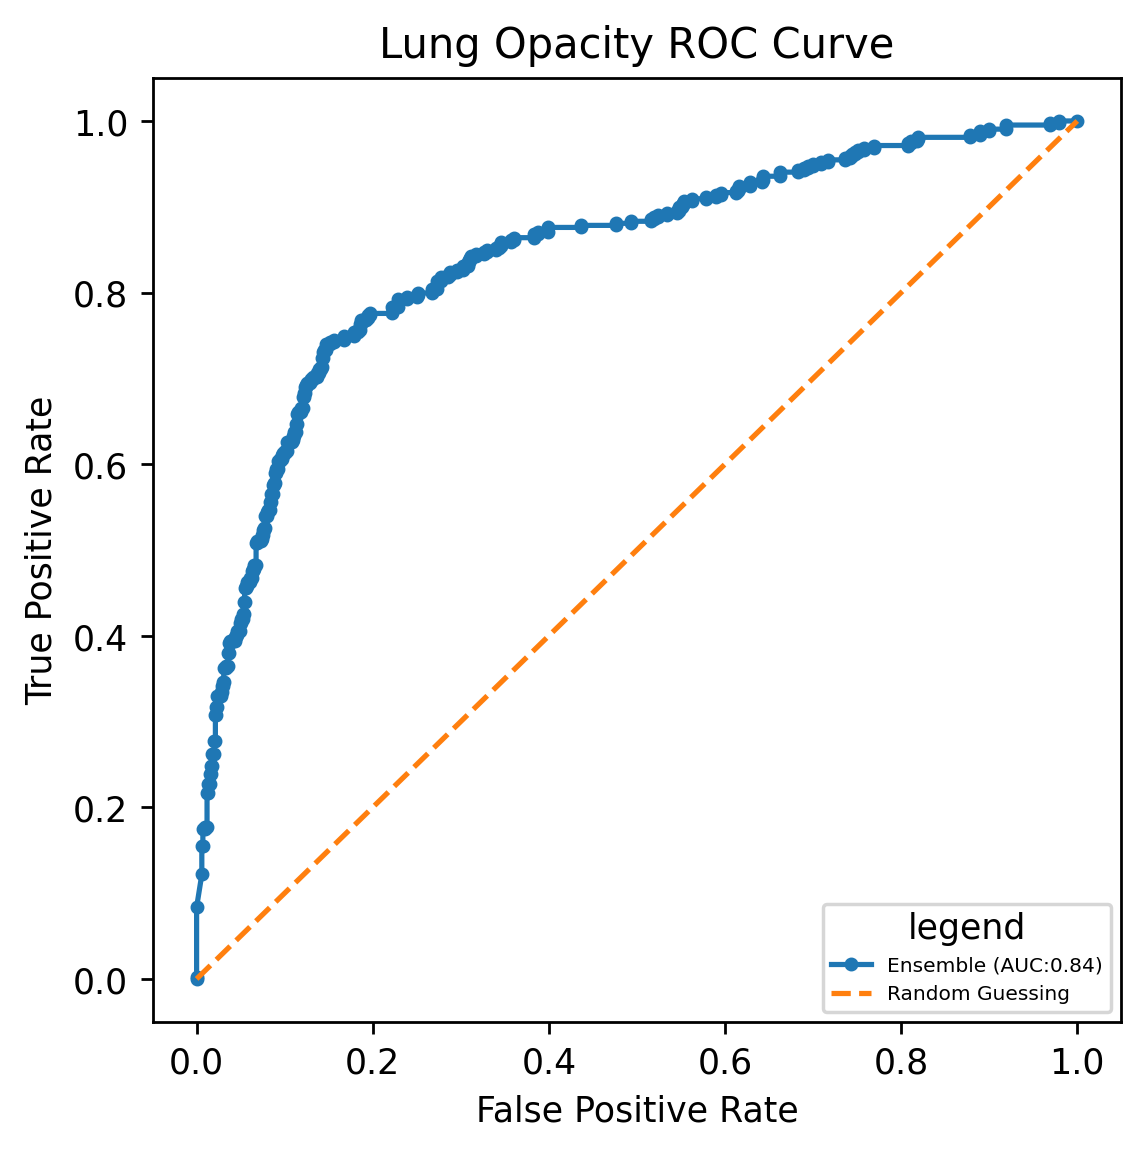

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('xx-small')
fpr, tpr, _ = roc_curve(y_test, pred_y)
fig, ax1 = plt.subplots(1,1, figsize = (5, 5), dpi = 250)
ax1.plot(fpr, tpr, marker='.', label = 'Ensemble (AUC:%2.2f)' % roc_auc_score(y_test, pred_y))
ax1.plot(fpr, fpr, linestyle='--', label = 'Random Guessing')
ax1.legend(title='legend',  loc='lower right', prop=fontP)
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate');
ax1.set_title('Lung Opacity ROC Curve')